In [1]:
# import required libraries

%matplotlib notebook

import time
from phySyncFirmata import ArduinoNano, util
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from phySyncFirmata.phyCom import common_Utility_2 as plotter

In [2]:
# declare board object (adjust port)

board = ArduinoNano('/dev/ttyUSB0')

In [3]:
# LEDS definition

pins = [10, 9, 6]

leds = {}

colors = ['R', 'G', 'B']

for l in range(3):
    leds[colors[l]] = board.get_pin('d:' + str(pins[l]) + ':p') 

# potentiometer declarations

potG = board.get_pin('a:2:i')
potR = board.get_pin('a:3:i')
potB = board.get_pin('a:4:i')

# enable reporting on all 3

potR.enable_reporting()
potG.enable_reporting()
potB.enable_reporting()

In [4]:
# reset all inputs, outputs (except for buzzer on pin 5)

for i in set(range(4, 14)) - {5}:
    board.digital[i].write(1)

In [5]:
# start iterator

it = util.Iterator(board)
it.start()

<IPython.core.display.Javascript object>


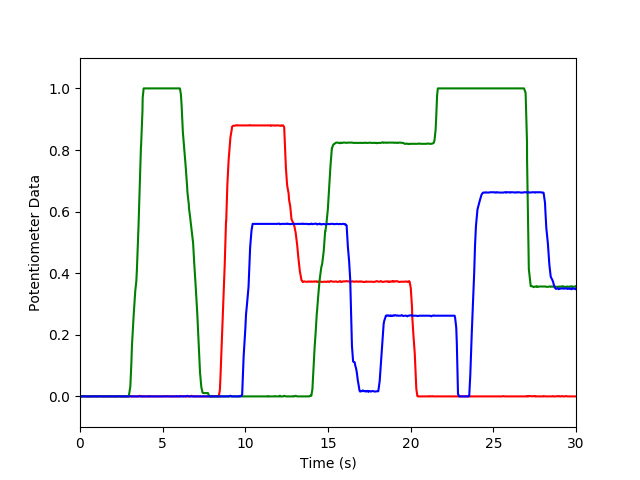

In [6]:
# set simulation time in seconds

simulation_time = 30

pots = {'R': potR, 'G': potG, 'B': potB}

for i in leds.values():
    i.write(1)

# color mixer and plotter -> values of R, G, B potentiometers are given as input to respective channels of RGB LED 
# values are also plotted -> same parameters as LDR example

fig, ax = plt.subplots()

interval_ms = 50

def writeR():
    val = potR.read()
    leds['R'].write(val)
    return 1 - val

def writeG():
    val = potG.read()
    leds['G'].write(val)
    return 1 - val

def writeB():
    val = potB.read()
    leds['B'].write(val)
    return 1 - val

pR = plotter.Plotter(fig, ax, writeR, style = 'r', timeSeconds = simulation_time)
pG = plotter.Plotter(fig, ax, writeG, style = 'g', timeSeconds = simulation_time)
pB = plotter.Plotter(fig, ax, writeB, style = 'b', timeSeconds = simulation_time)

aniR = animation.FuncAnimation(fig, pR.update, pR.gen, blit = True, interval = interval_ms, repeat = False)
aniG = animation.FuncAnimation(fig, pG.update, pG.gen, blit = True, interval = interval_ms, repeat = False)
aniB = animation.FuncAnimation(fig, pB.update, pB.gen, blit = True, interval = interval_ms, repeat = False)

plt.xlabel('Time (s)')
plt.ylabel('Potentiometer Data')

plt.show()

In [7]:
# dim LEDS

for i in leds:
    leds[i].write(1)
    
# free up pins

potR.disable_reporting()
potG.disable_reporting()
potB.disable_reporting()

In [9]:
# exit the board

board.exit()